In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
%matplotlib inline


In [6]:
df = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx')
df2 = pd.read_csv('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx - All Children with IFSPs.csv')

df.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136.0,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136.0,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585.0,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852.0,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051.0,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CHILD_ID              9543 non-null   float64       
 1   SERVICE_DATE          9543 non-null   datetime64[ns]
 2   START_TIME            9532 non-null   object        
 3   END_TIME              9532 non-null   object        
 4   SERVICE_SETTING       9533 non-null   object        
 5   SERVICE DELIVERY      9543 non-null   object        
 6   ADD_USER              9543 non-null   object        
 7   ADD_DATE              9543 non-null   datetime64[ns]
 8   IFSP Teaming ID name  9543 non-null   object        
 9   Agency Name           9543 non-null   object        
 10  Agency Type           9543 non-null   object        
 11  Service Name          9543 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 894.8+ KB


In [15]:
df2.columns

Index(['POE', 'Child ID', 'Referral Date', 'Exit Date'], dtype='object')

In [13]:
df = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx')

df.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136.0,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136.0,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585.0,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852.0,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051.0,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [18]:
df2.columns = df2.columns.str.upper()
df2.rename(columns={'CHILD ID': 'CHILD_ID'}, inplace=True)

In [20]:
merged_df = pd.merge(df, df2, on='CHILD_ID')

In [21]:
merged_df

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,POE,REFERRAL DATE,EXIT DATE
0,457136.0,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,SE,2/28/2019,NaN
1,457136.0,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,SE,2/28/2019,2/18/2022
2,457136.0,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,SE,2/28/2019,NaN
3,457136.0,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,SE,2/28/2019,2/18/2022
4,457585.0,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,SE,3/6/2019,1/28/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97608,541890.0,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,UC,11/30/2022,NaN
97609,542077.0,2023-01-30,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,2023-01-30 15:21:59,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community,ET,12/2/2022,NaN
97610,542077.0,2023-01-30,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,2023-01-30 15:21:59,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community,ET,12/2/2022,NaN
97611,542122.0,2023-01-30,13:00:00,14:00:00,Home,Service Delivered,QUINNEMILY,2023-02-02 21:54:53,Co-Visit,Little Folks Arc of Washington Co.,EIRA,Dev. Therapy Prof - Home/Community,FT,12/5/2022,NaN


In [30]:
co_visits_telehealth_df = merged_df[(merged_df['IFSP Teaming ID name'] == 'Co-Visit') & (merged_df['SERVICE_SETTING'] == 'Telehealth')]
num_co_visits_telehealth = co_visits_telehealth_df.shape[0]
print("Number of co-visits conducted via telehealth:", num_co_visits_telehealth)


Number of co-visits conducted via telehealth: 7740


C:\Users\redst\AppData\Local\Temp\ipykernel_21296\2444743141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_visits_telehealth_df['Month'] = pd.to_datetime(co_visits_telehealth_df['SERVICE_DATE']).dt.month


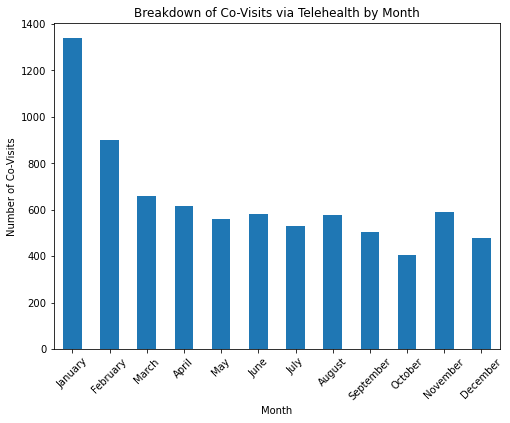

In [37]:
co_visits_telehealth_df = merged_df[(merged_df['IFSP Teaming ID name'] == 'Co-Visit') & (merged_df['SERVICE_SETTING'] == 'Telehealth')]
co_visits_telehealth_df['Month'] = pd.to_datetime(co_visits_telehealth_df['SERVICE_DATE']).dt.month
co_visits_by_month = co_visits_telehealth_df['Month'].value_counts().sort_index()
month_names = [calendar.month_name[i] for i in co_visits_by_month.index]
plt.figure(figsize=(8, 6))
co_visits_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Co-Visits')
plt.title('Breakdown of Co-Visits via Telehealth by Month')
plt.xticks(range(len(co_visits_by_month)), month_names, rotation=45)
plt.show()


1. How many children are receiving co-visits? What is the rate of co-visits? That is, out of children how have an IFSP, how many are receiving co-visits? What is the cadence of co-visits?

2. Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits? In what setting do co-visits typically occur?


3. Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within the same agency?

4. Does participation vary by service type? by service setting? by point of entry?


5. What is the rate of telehealth versus other services? Is telehealth used for a specific type of FSP Teaming ID Name?